In [5]:
from yahoofinancials import YahooFinancials
import json
import math
import numpy as np
from sklearn.manifold import MDS
from sklearn.neighbors import LocalOutlierFactor as LOF
from sklearn.svm import OneClassSVM
from scipy.stats import entropy
from matplotlib import pyplot as plt
from scipy.stats import energy_distance
import seaborn as sns
import datetime
import warnings
from scipy.special import kl_div
import csv
warnings.filterwarnings('ignore')

In [6]:
SP500_symbols = ['AAPL', 'ABT', 'ABBV', 'ACN', 'ACE', 'ADBE', 'ADT', 'AAP', 'AES', 'AET', 'AFL', 'AMG', 'A', 'GAS', 'ARE', 'APD', 'AKAM', 'AA', 'AGN', 'ALXN', 'ALLE', 'ADS', 'ALL', 'ALTR', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'AON', 'APA', 'AIV', 'AMAT', 'ADM', 'AIZ', 'T', 'ADSK', 'ADP', 'AN', 'AZO', 'AVGO', 'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 'BK', 'BCR', 'BXLT', 'BAX', 'BBT', 'BDX', 'BBBY', 'BRK.B', 'BBY', 'BLX', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BMY', 'BRCM', 'BF.B', 'CHRW', 'CA', 'CVC', 'COG', 'CAM', 'CPB', 'COF', 'CAH', 'HSIC', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHK', 'CVX', 'CMG', 'CB', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CTXS', 'CLX', 'CME', 'CMS', 'COH', 'KO', 'CCE', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CSC', 'CAG', 'COP', 'CNX', 'ED', 'STZ', 'GLW', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DLPH', 'DAL', 'XRAY', 'DVN', 'DO', 'DTV', 'DFS', 'DISCA', 'DISCK', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DPS', 'DTE', 'DD', 'DUK', 'DNB', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMC', 'EMR', 'ENDP', 'ESV', 'ETR', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'XOM', 'FFIV', 'FB', 'FAST', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FTI', 'F', 'FOSL', 'BEN', 'FCX', 'FTR', 'GME', 'GPS', 'GRMN', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GNW', 'GILD', 'GS', 'GT', 'GOOGL', 'GOOG', 'GWW', 'HAL', 'HBI', 'HOG', 'HAR', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HCN', 'HP', 'HES', 'HPQ', 'HD', 'HON', 'HRL', 'HSP', 'HST', 'HCBK', 'HUM', 'HBAN', 'ITW', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JEC', 'JBHT', 'JNJ', 'JCI', 'JOY', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'GMCR', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KRFT', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LM', 'LEG', 'LEN', 'LVLT', 'LUK', 'LLY', 'LNC', 'LLTC', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MNK', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MJN', 'MMV', 'MDT', 'MRK', 'MET', 'KORS', 'MCHP', 'MU', 'MSFT', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MUR', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NEE', 'NLSN', 'NKE', 'NI', 'NE', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'OI', 'PCAR', 'PLL', 'PH', 'PDCO', 'PAYX', 'PNR', 'PBCT', 'POM', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PBI', 'PCL', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCP', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RTN', 'O', 'RHT', 'REGN', 'RF', 'RSG', 'RAI', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RLD', 'R', 'CRM', 'SNDK', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SPG', 'SWKS', 'SLG', 'SJM', 'SNA', 'SO', 'LUV', 'SWN', 'SE', 'STJ', 'SWK', 'SPLS', 'SBUX', 'HOT', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYY', 'TROW', 'TGT', 'TEL', 'TE', 'TGNA', 'THC', 'TDC', 'TSO', 'TXN', 'TXT', 'HSY', 'TRV', 'TMO', 'TIF', 'TWX', 'TWC', 'TJX', 'TMK', 'TSS', 'TSCO', 'RIG', 'TRIP', 'FOXA', 'TSN', 'TYC', 'UA', 'UNP', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'URBN', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'ANTM', 'WFC', 'WDC', 'WU', 'WY', 'WHR', 'WFM', 'WMB', 'WEC', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZBH', 'ZION', 'ZTS']
SP500_symbol_short = ['AAPL', 'ABT', 'ABBV', 'ACN', 'ACE', 'ADBE', 'ADT', 'AAP', 'AES', 'AET', 'AFL', 'AMG', 'A', 'GAS', 'ARE', 'APD', 'AKAM', 'AA', 'AGN', 'ALXN', 'ALLE', 'ADS', 'ALL', 'ALTR', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'AON', 'APA', 'AIV', 'AMAT', 'ADM', 'AIZ', 'T', 'ADSK', 'ADP', 'AN', 'AZO', 'AVGO', 'AVB', 'AVY', 'BHI']
benchmark = '^GSPC'  # SP500 index

In [7]:
# start_date = '2016-01-01'
# end_date = '2016-12-31'
# test_start = '2017-01-01'
# test_end = '2018-01-01'

start_date = '2010-01-01'
end_date = '2011-12-31'
test_start = '2012-01-01'
test_end = '2013-01-01'

In [8]:
# yahoo_financials_sp500 = YahooFinancials(SP500_symbols)
# historical_stock_prices = yahoo_financials_sp500.get_historical_price_data(start_date, end_date, 'daily')

In [9]:
# portfolio: 2D array, each row contains 2 prices - buy and sell price of the stock
# benchmark: 1D array with two elements, initial and final price of compared benchmark
# return in % how much better portfolio compare to benchmark
def estimate_result(portfolio, benchmark):
    portfolio_size = len(portfolio)
    port_result = 0
    for stock in portfolio:
        port_result += (stock[1]/stock[0])/portfolio_size
    return (port_result - benchmark[1]/benchmark[0]) * 100

# creation of portfolio:
#             anomaly_indexes.index(i)
#             if len(portfolio_start_end) > 0:
#                 portfolio_start_end = np.vstack((portfolio_start_end, [prices[0], prices[-1]]))
#             else:
#                 portfolio_start_end = np.array([prices[0], prices[-1]])
#         except:
#             pass

In [10]:
# matrix: 2D array of distance measure of variables
# trevial approach based on mean distance 
# return the list of indexes with detected anomalies
def find_anomaly_custom(matrix):
    result = []
    mean_distance = np.mean(matrix) / 5
    print(mean_distance)
    # if cloud_number of nearest points located father than mean_distance, then it's anomaly  
    cloud_number = 5
    for i, stock in enumerate(matrix):
        elements_closer_mean = len(list(filter(lambda x: x < mean_distance, stock)))
        if elements_closer_mean < cloud_number:
            result.append(i)
    return result

# base on local outlier factor
def find_anomaly_lof(matrix, per_out):
    detector = LOF(metric='precomputed', contamination=per_out)
    inlines = detector.fit_predict(matrix)
    result = []
    for i, res in enumerate(inlines):
        if res == -1:
            result.append(i)
    return result

def find_anomaly_svm(matrix, per_out):
    detector = OneClassSVM(kernel='precomputed', nu=per_out)
    inlines = detector.fit_predict(matrix)
    result = []
    for i, res in enumerate(inlines):
        if res == -1:
            result.append(i)
    return result

# use pre-computed matrix of distances!!
# general function to find outliers, approach one of ['custom', 'lof', 'svm']
def find_anomaly(matrix, approach, per_out):
    if approach=='custom':
        return find_anomaly_custom(matrix)
    if approach=='lof':
        return find_anomaly_lof(matrix, per_out)
    if approach=='svm':
        return find_anomaly_svm(matrix, per_out)

In [11]:
def convert_data(point):
    return point['adjclose']

def create_distance_matrix(historical_prices, approach='corr'):
    prices_matrix = []
#   need to normalize data by the percantage of change -> escape effect of different scale
    for stock_prices in historical_prices:
        new_array = stock_prices.copy() # single stock time serie
        for i, element in enumerate(stock_prices):
            if i == 0 or stock_prices[i-1] == 0:
                new_array[i] = 10E-20 #initial change is zero
            else:
                new_array[i] = (stock_prices[i] - stock_prices[i-1])/stock_prices[i-1]
            
            if math.isnan(new_array[i]) or new_array[i] == 0:
                new_array[i] = 10E-20
#         build matrix back
        if len(prices_matrix) > 0:
            prices_matrix = np.vstack((prices_matrix, new_array))
        else:
            prices_matrix = np.array(new_array)
    if approach=='corr':
        return np.absolute(np.corrcoef(prices_matrix))
    
    if approach=='KL':
        distances_matrix = np.zeros((len(prices_matrix), len(prices_matrix)))
        for i, stock in enumerate(prices_matrix):
            for j, stock_2 in enumerate(prices_matrix):
                distances_matrix[i][j] = entropy(stock, qk=stock_2)
        return distances_matrix
    
    if approach=='custom':
        distances_matrix = np.zeros((len(prices_matrix), len(prices_matrix)))
        np.shape(distance_matrix)
        for i, stock in enumerate(prices_matrix):
            for j, stock_2 in enumerate(prices_matrix):
                k = 0
                for q, price in enumerate(stock):
                    if (price > 0 and stock_2[q] > 0) or (price <= 0 and stock_2[q] <= 0):
                        k += 1
                if abs(k/len(stock) - 0.5) * 2 > 1:
                    print(k, abs(k/len(stock) - 0.5) * 2)
                distances_matrix[i][j] = abs(k/len(stock) - 0.5) * 2
        return distances_matrix

def create_prices_matrix(historical_stock_prices):
    prices_matrix = []
    company_names = []
    for stock_name in historical_stock_prices:
        try:
            new_array = list(map(convert_data, historical_stock_prices[stock_name]['prices']))
            if len(prices_matrix) > 0:
                prices_matrix = np.vstack((prices_matrix, new_array))
            else:
                prices_matrix = np.array(new_array)
            company_names.append(stock_name)
        except:
            pass
    return prices_matrix, company_names   

In [12]:
def draw_matrix(matrix, company_names):
    embedding = MDS(n_components=2)
    X_transformed = embedding.fit_transform(matrix)

    fig, ax = plt.subplots()
    ax.scatter(X_transformed[:, 0], X_transformed[:, 1], color='navy', lw=0)
    for i, name in enumerate(company_names):
        ax.annotate(name, (X_transformed[i, 0], X_transformed[i, 1]))
    plt.show()

In [13]:
historical_price_data = YahooFinancials(SP500_symbols).get_historical_price_data('2006-01-01', '2019-05-01', 'daily')
benchmark_price_data = YahooFinancials(benchmark).get_historical_price_data('2006-01-01', '2019-05-01', 'daily')


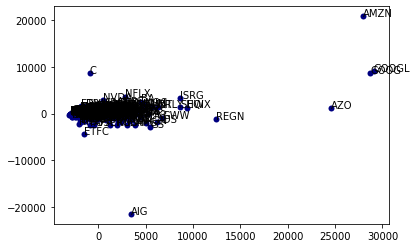

In [14]:
matrix, names = create_prices_matrix(historical_price_data)
draw_matrix(matrix, names)

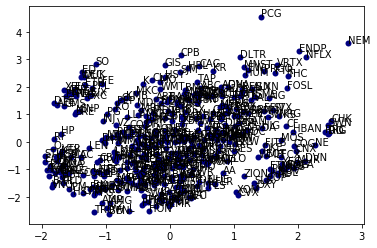

In [15]:
distance_matrix = create_distance_matrix(historical_prices=matrix, approach='corr')
draw_matrix(distance_matrix, names)

In [16]:
distance_matrix_KL = create_distance_matrix(historical_prices=matrix, approach='KL')
draw_matrix(distance_matrix_KL, names)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

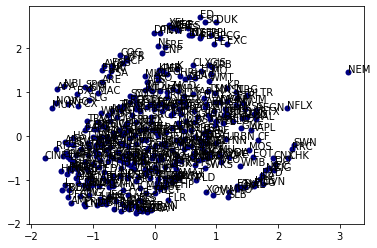

In [17]:
distance_matrix_custom = create_distance_matrix(historical_prices=matrix, approach='custom')
draw_matrix(distance_matrix_custom, names)

In [ ]:
def calc_diff(a, b):
    return (b-a)/a

In [ ]:
def create_portfolio_and_test(anomaly_indexes, full_list_stock_name, test_prices, benchmark_prices):
    portfolio_start_end = []
    benchmark_change = calc_diff(benchmark_prices[0], benchmark_prices[-1])
    all_stock_changes_compare_to_benchmark = []
    for i, prices in enumerate(test_prices):
        all_stock_changes_compare_to_benchmark.append(calc_diff(prices[0], prices[-1]))
    anomaly_values = [round(all_stock_changes_compare_to_benchmark[i], 2) for i in anomaly_indexes]
#     print('sp500 change: ',benchmark_change)
    mean = np.mean(all_stock_changes_compare_to_benchmark)
    std = np.std(all_stock_changes_compare_to_benchmark)
#     print(mean, std)
#     sns.distplot(all_stock_changes_compare_to_benchmark)

#     ouside_2std = []
#     for i in all_stock_changes_compare_to_benchmark:
#         if i > mean + 2*std or i < mean - 2*std:
#             ouside_2std.append(i)
#     print('outstanding values from 2std: \n  percentage: ', len(ouside_2std)/len(full_list_stock_name), ' \n  values: ', [round(i,2) for i in ouside_2std])
    
    true_anomalies = []
    for i in anomaly_values:
        if i > mean + 1.5*std or i < mean - 1.5*std:
            true_anomalies.append(i)
#     print(
#         'percentage of anomalies outside 2std: ', len(true_anomalies) / len(anomaly_indexes), 
#         'true anomalies values: ', [round(i,2) for i in true_anomalies])
#     print(anomaly_values)
    
    return len(true_anomalies) / len(anomaly_indexes)

def run_test(prices, company_names, benchmark_prices, distance, detector, per_out):
    threshold = round(len(prices[0]) * 2 / 3)
    distances = create_distance_matrix(prices[:, 0:threshold], distance)
    anomalies = find_anomaly(distances, detector, per_out)
#     print('number of anomalies ', len(anomalies))
    return len(anomalies), create_portfolio_and_test(anomalies, company_names, prices[:, threshold:], benchmark_prices)

prices_matrix, company_names = create_prices_matrix(historical_price_data)
benchmark_prices = list(map(convert_data, benchmark_price_data[benchmark]['prices']))
with open('resutls.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                        quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['step N days', 'distance', 'anomaly_detector', '% of anomalies', 'avg number of anomalies', 'avg "true" anomalies percentage'])
    j = 0
    for distance in ['corr', 'custom']:
        for detector in ['svm', 'lof']:
            for per_out in [0.01, 0.02, 0.03, 0.05, 0.065, 0.08, 0.1]:
                for step in [10, 30, 50, 80, 100, 200, 300, 500, 700, 9000]:
                    results = []
                    for i in range(round(len(benchmark_prices)/step)-2):
                        start_index = step*i
                        end_index = step*2 + step*i
                        results.append(run_test(prices_matrix[:,start_index:end_index], company_names, benchmark_prices[start_index:end_index], distance, detector, per_out))
                    writer.writerow([step, distance, detector, per_out, round(np.mean([i[0] for i in results]),2), round(np.mean([i[1] for i in results]),4)])
                    j+=1
                    print(j)
print('done!')